# 0. 라이브러리 및 함수 정의

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt 
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

from matplotlib import font_manager, rc
font_path="./malgun.ttf"
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc("font", family=font_name)

In [2]:
df_build = pd.read_csv('./건축허가현황.csv', index_col=0)
df_money = pd.read_csv('./국내건설수주액.csv', index_col=0)
df_house = pd.read_csv('./미분양주택현황.csv', index_col=0)
df_apart = pd.read_csv('./아파트 실거래가격지수.csv', index_col=0)
df_hmoney = pd.read_csv('./유형별_주택월세통합가격지수.csv', index_col=0)
df_build2 = pd.read_csv('./주택건설인허가실적.csv', index_col=0)
df_kb1 = pd.read_csv('./주택매매가격지수(KB).csv', index_col=0)
df_kb2 = pd.read_csv('./주택전세가격지수(KB).csv', index_col=0)
df_region = pd.read_csv('./지역별_지가변동률.csv', index_col=0)

In [3]:
def show_graph(df):
    index = pd.to_datetime(df.index)
    cols = df.columns.values
    
    fig, ax = plt.subplots(figsize=(15,3))
    ax.plot(index, df.values)
    
    fig.autofmt_xdate()
    plt.legend(cols, bbox_to_anchor=(1.01,1))

In [4]:
def show_graph2(df, new_data):
    index = pd.to_datetime(df.index)
    cols = df.columns.values
    
    fig, ax = plt.subplots(figsize=(15,3))
    ax.plot(index, new_data)
    
    fig.autofmt_xdate()
    plt.legend(cols, bbox_to_anchor=(1.01,1))

In [5]:
def show_bytype(df, cols_bytype, new_data):
    index = pd.to_datetime(df.index)
    cols = df.columns.values
    
    arr_bytype = np.zeros(shape=(df.shape[0], len(cols)))
    
    for i, col in enumerate(cols):
        for j, type1 in enumerate(cols_bytype):
            if col == type1:
                arr_bytype[:, j] = new_data[:, i]
                
    fig, ax = plt.subplots(figsize=(15,3))
    ax.margins(x=0.02, y=0.03)
    ax.plot(index, arr_bytype)
    
    fig.autofmt_xdate()
    plt.legend(cols_bytype, loc=0, bbox_to_anchor=(1.01, 1))

In [6]:
def show_bytype_og(df, cols_bytype):
    index = pd.to_datetime(df.index)
    cols = df.columns.values
    
    arr_bytype = np.zeros(shape=(df.shape[0], len(cols)))
    
    for i, col in enumerate(cols):
        for j, type1 in enumerate(cols_bytype):
            if col == type1:
                arr_bytype[:, j] = df.values[:, i]
                
    fig, ax = plt.subplots(figsize=(15,3))
    ax.margins(x=0.02, y=0.03)
    ax.plot(index, arr_bytype)
    
    fig.autofmt_xdate()
    plt.legend(cols_bytype, loc=0, bbox_to_anchor=(1.01,1))

In [7]:
# 전월대비 변동률 계산
def get_ratio(df):
    rtn_arr = np.zeros(shape=df.values.shape)
    values = df.values
    
    for i, row in enumerate(values):
        if i == 0:
            continue
        rtn_arr[i] = row / values[i-1] - 1
        
    return rtn_arr

# 1. 가격 관련 지수
> **1) 지역별 지가변동률 확인**   
2009년 전체적인 지가가 대폭 하락   
2016년 제주도 지가가 대폭 상승   
2020년 말부터 세종시 지가가 대폭 상승

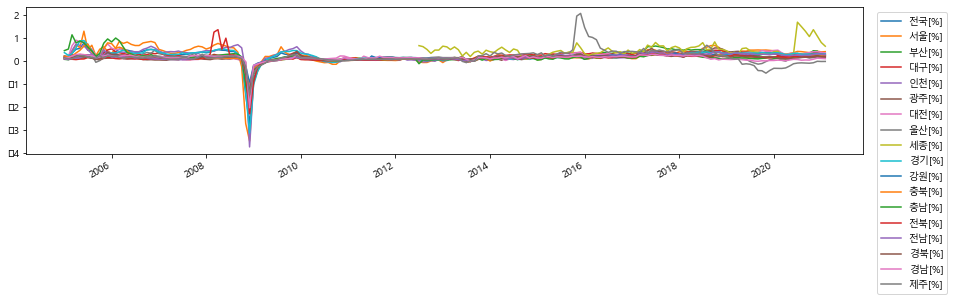

In [8]:
# 데이터 시각화
show_graph(df_region)

> **2015년 1월 1일에 동일 가격의 땅을 샀다면, 2021년 2월 1일에 가장 수익이 큰 지역은 어디일까?**   
서울의 지가가 1.7배로 가장 많이 상승   
이어서 대구, 경기, 부산 순으로 지가가 원금보다 내려간 지역은 없음

In [9]:
df_region

,전국[%],서울[%],부산[%],대구[%],인천[%],광주[%],대전[%],울산[%],세종[%],경기[%],강원[%],충북[%],충남[%],전북[%],전남[%],경북[%],경남[%],제주[%]
2005-01-01,0.226,0.192,0.083,0.212,0.145,0.156,0.196,0.137,NaN,0.374,0.142,0.221,0.463,0.108,0.099,0.163,0.140,0.150
2005-02-01,0.184,0.140,0.065,0.208,0.208,0.080,0.206,0.153,NaN,0.256,0.169,0.178,0.531,0.084,0.071,0.135,0.160,0.111
2005-03-01,0.348,0.403,0.119,0.278,0.470,0.154,0.674,0.180,NaN,0.324,0.257,0.227,1.154,0.085,0.139,0.161,0.225,0.102
2005-04-01,0.525,0.725,0.151,0.258,0.751,0.159,0.917,0.149,NaN,0.591,0.221,0.358,0.804,0.071,0.127,0.209,0.291,0.181
2005-05-01,0.562,0.590,0.185,0.254,0.693,0.291,0.850,0.131,NaN,0.882,0.229,0.476,0.883,0.094,0.152,0.224,0.310,0.247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-01,0.294,0.375,0.337,0.265,0.295,0.277,0.375,0.138,1.077,0.307,0.194,0.244,0.206,0.190,0.255,0.189,0.048,-0.088
2020-11-01,0.322,0.405,0.458,0.326,0.287,0.370,0.416,0.161,1.378,0.310,0.209,0.269,0.206,0.214,0.293,0.186,0.087,-0.068
2020-12-01,0.343,0.437,0.444,0.387,0.295,0.389,0.417,0.180,1.103,0.327,0.243,0.280,0.232,0.219,0.312,0.200,0.132,-0.004
2021-01-01,0.311,0.408,0.281,0.342,0.297,0.305,0.386,0.184,0.818,0.308,0.219,0.247,0.205,0.196,0.295,0.183,0.121,-0.012


In [10]:
df_2005 = df_region.iloc[:, 1:].drop('세종[%]', axis=1)   # 2005년 세종시 데이터는 없어 제외
money_2005 = np.ones(shape=df_2005.values.shape)

for i, row in enumerate(df_2005.values):
    if i == 0:
        continue
    money_2005[i] = money_2005[i-1] * (1+row/100)

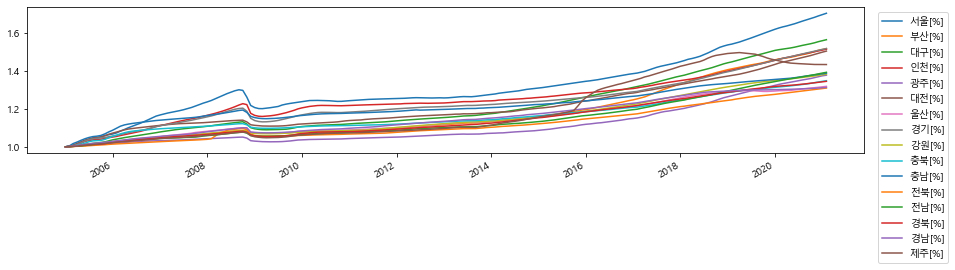

In [11]:
show_graph2(df_2005, money_2005)

[('서울', 1.7013069103288752), ('대구', 1.5624779152972486), ('경기', 1.5162802827854507), ('부산', 1.5153752950115078), ('인천', 1.5124429228167653), ('대전', 1.5026077667829352), ('제주', 1.4320587159360598), ('전남', 1.3912296491389817), ('충남', 1.386505318057887), ('강원', 1.3813340257536424), ('광주', 1.376178962559974), ('충북', 1.3470346202029857), ('경북', 1.3438719392155907), ('울산', 1.3174124084211885), ('경남', 1.3119252232104253), ('전북', 1.3085454813889836)]


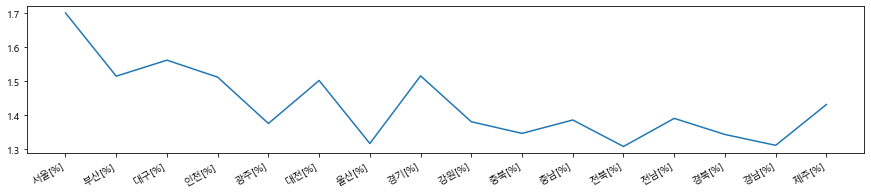

In [12]:
# 데이터 상승률 수치화
index = pd.to_datetime(df_2005.index)
cols = df_2005.columns.values

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(cols,money_2005[-1])

fig.autofmt_xdate()

values1 = []
for i, col in enumerate(cols):
    values1.append((col.replace('[%]',''), money_2005[-1][i]))
values1.sort(key=lambda x: -x[1])

print(values1)

> **2) 아파트 실거래가격지수 확인**   
동북권, 서북권, 서울 순으로 상승   
전체적인 실거래 변동률은 지가와 같이 2009년에 크게 흔들림   
세종시 변동률은 지가변동률과 마찬가지로 2020년 말 크게 상승

In [13]:
print(len(df_apart.values))
df_apart.isnull().sum()

181


도심권[2017.11=100]        0
동북권[2017.11=100]        0
동남권[2017.11=100]        0
부산[2017.11=100]         0
대구[2017.11=100]         0
인천[2017.11=100]         0
광주[2017.11=100]         0
대전[2017.11=100]         0
울산[2017.11=100]         0
세종[2017.11=100]         0
경기[2017.11=100]         0
강원[2017.11=100]         0
충북[2017.11=100]         0
충남[2017.11=100]         0
서북권[2017.11=100]        0
서남권[2017.11=100]        0
전북[2017.11=100]         0
전남[2017.11=100]         0
경북[2017.11=100]         0
경남[2017.11=100]         0
제주[2017.11=100]         0
광역시[2017.11=100]      181
지방광역시[2017.11=100]      0
지방도[2017.11=100]        0
전국[2017.11=100]         0
서울[2017.11=100]         0
수도권[2017.11=100]        0
지방[2017.11=100]         0
dtype: int64

In [14]:
df_apart = df_apart.drop('광역시[2017.11=100]', axis=1)   # 모든 데이터가 null인 광역시 제외

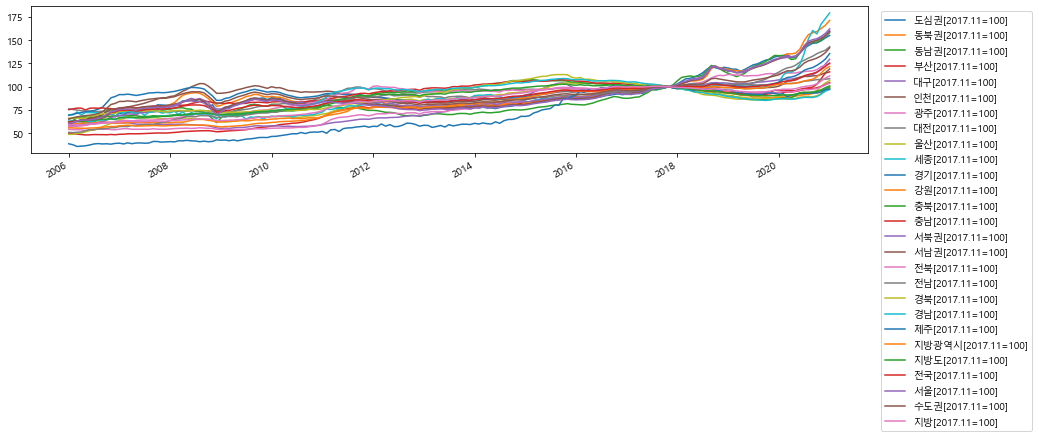

In [15]:
# 데이터 시각화
show_graph(df_apart)

[('동북권', 2.9033898305084747), ('서북권', 2.7933450087565674), ('서울', 2.6765676567656764), ('서남권', 2.669449081803005), ('도심권', 2.615514333895447), ('세종', 2.568767908309456), ('동남권', 2.55), ('제주', 2.521963824289405), ('부산', 2.334004024144869), ('광주', 2.302583025830258), ('울산', 2.182377049180328), ('지방광역시', 2.1810035842293907), ('수도권', 2.168195718654434), ('전남', 2.1294117647058823), ('대구', 2.072), ('전국', 2.02258064516129), ('경기', 1.9595375722543351), ('인천', 1.908653846153846), ('지방', 1.8883248730964466), ('대전', 1.8791064388961893), ('전북', 1.8192982456140352), ('강원', 1.6258169934640523), ('지방도', 1.6195826645264848), ('경남', 1.5396825396825398), ('충북', 1.5322085889570551), ('경북', 1.4766214177978885), ('충남', 1.3846153846153846)]


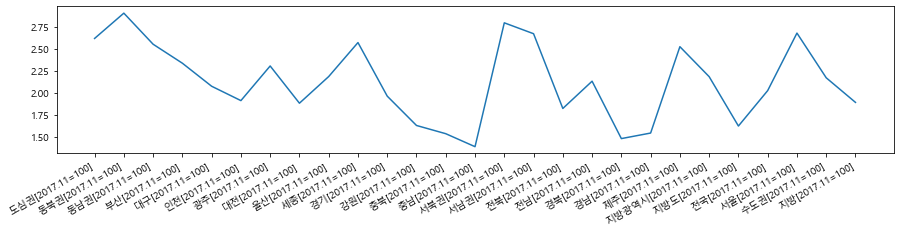

In [16]:
# 데이터 상승률 수치화
based_2006 = df_apart.values[-1] / df_apart.values[0]
cols = df_apart.columns.values

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(cols, based_2006)

fig.autofmt_xdate()

values1 = []
for i, col in enumerate(cols):
    values1.append((col.replace('[2017.11=100]', ''), based_2006[i]))
values1.sort(key=lambda x: -x[1])

print(values1)

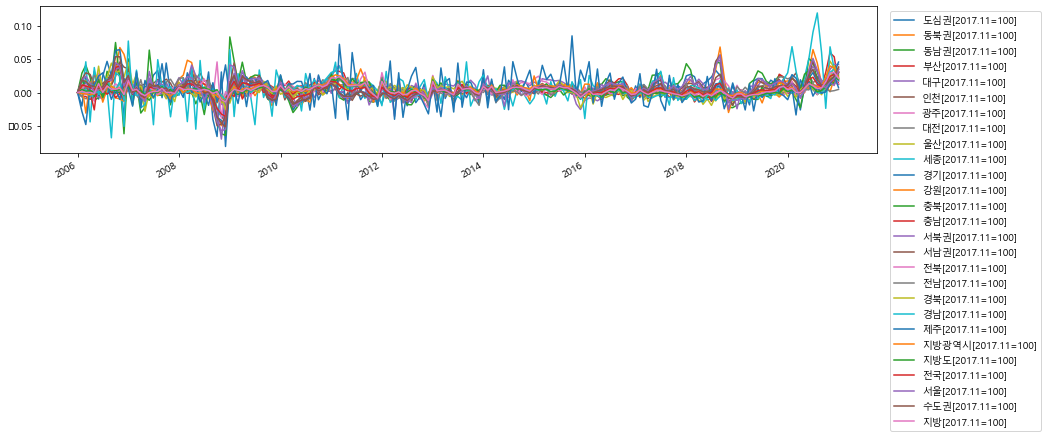

In [17]:
# 전월대비 변동률 계산
apart_change = get_ratio(df_apart) 

show_graph2(df_apart, apart_change)

> **3) 주택매매가격지수 확인**   
단독주택은 변동이 적은 편이나, 아파트(서울)과 총지수(아파트)는 많이 상승   
서울의 아파트가 7배 상승, 단독주택은 제일 낮은 상승률을 보임   
변동률에서 1992년과 1998년에 큰 하락, 주택구분별로 변동률 차이는 적음

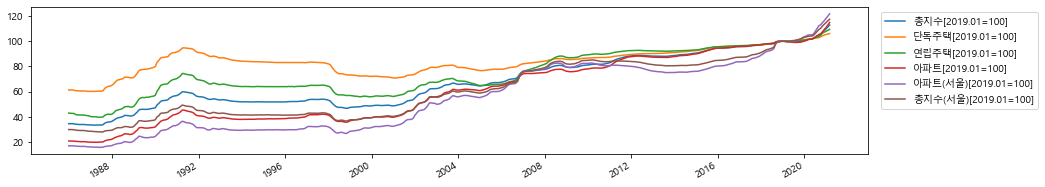

In [18]:
# 데이터 시각화
show_graph(df_kb1)

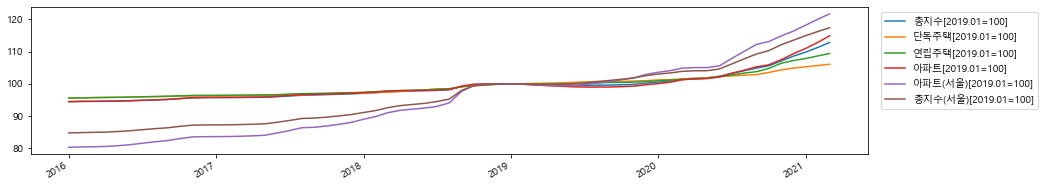

In [19]:
df_kb1_before5 = df_kb1[(df_kb1.index >= '2016-01-01')]   # 최근 5년 이내 데이터로 확인

show_graph(df_kb1_before5)

[('아파트(서울)', array([7.09619309])), ('아파트', array([5.47899681])), ('총지수(서울)', array([3.90796831])), ('총지수', array([3.25605956])), ('연립주택', array([2.54163473])), ('단독주택', array([1.72942442]))]


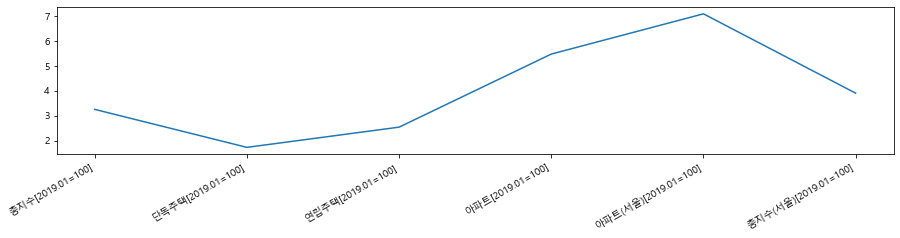

In [20]:
# 데이터 상승률 수치화
based_1986 = df_kb1.values[-1] / df_kb1.values[0]
cols = df_kb1.columns.values

fig, ax = plt.subplots(figsize=(15,3))
ax.plot(cols, based_1986)

fig.autofmt_xdate()

values1 = []
for i, col in enumerate(cols):
    values1.append((col.replace('[2019.01=100]', ''), based_1986[[i]]))
values1.sort(key=lambda x: -x[1])

print(values1)

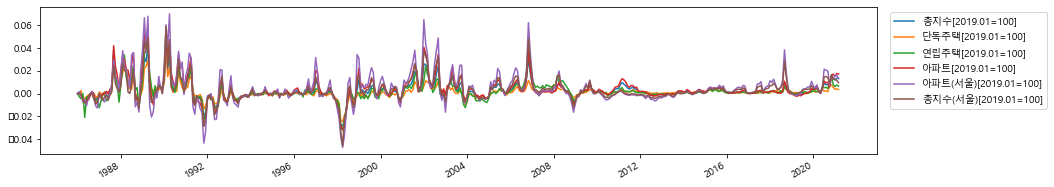

In [21]:
# 전월대비 변동률 계산
kb1_change = get_ratio(df_kb1)

show_graph2(df_kb1, kb1_change)

> **4) 주택전세가격지수 확인**   
전세 가격은 1998년에만 크게 떨어짐   
2004년 이후에는 매매가격 변동에 비해 전세 가격의 변동은 적음

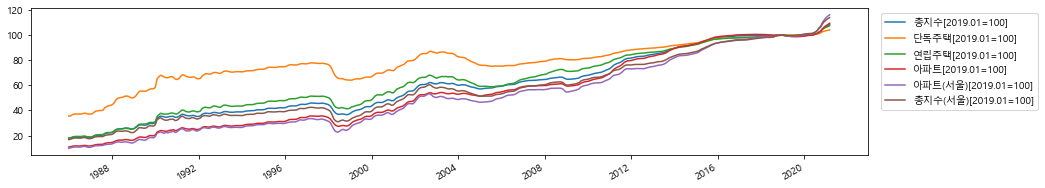

In [22]:
# 데이터 시각화
show_graph(df_kb2)

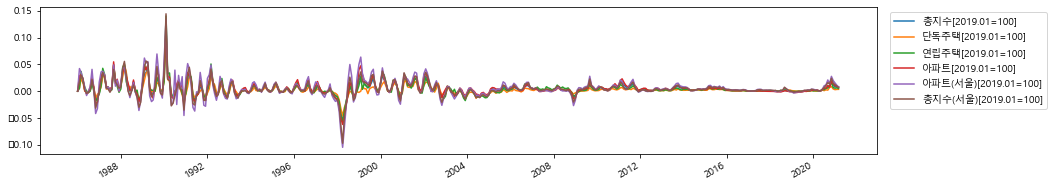

In [23]:
# 전월대비 변동률 계산
kb2_change = get_ratio(df_kb2)

show_graph2(df_kb2, kb2_change)

> **5) 주택월세가격지수 확인**   
전국 단위로 봤을 때 아파트 변동률이 상대적으로 큼   
아파트 지역별의 경우 세종시의 변동률이 가장 큼

In [24]:
df_hmoney.describe()

,종합-전국[2017.11=100],종합-수도권[2017.11=100],종합-지방[2017.11=100],종합-5대광역시[2017.11=100],종합-8개도[2017.11=100],종합-서울[2017.11=100],종합-경기[2017.11=100],종합-인천[2017.11=100],종합-부산[2017.11=100],종합-대구[2017.11=100],...,단독주택-강원[2017.11=100],단독주택-충북[2017.11=100],단독주택-충남[2017.11=100],단독주택-전북[2017.11=100],단독주택-전남[2017.11=100],단독주택-경북[2017.11=100],단독주택-경남[2017.11=100],단독주택-제주[2017.11=100],단독주택-6대광역시[2017.11=100],단독주택-9개도[2017.11=100]
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,...,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,99.430000,99.628571,99.250000,99.435714,99.047143,99.902857,99.421429,99.602857,99.292857,100.422857,...,99.720000,99.552857,99.712857,99.955714,100.108571,99.995714,99.184286,98.824286,99.798571,99.745714
std,0.897234,0.435438,1.431909,0.919363,1.800702,0.318043,0.572787,0.388222,0.708606,0.551985,...,0.325977,1.396551,0.279711,0.282143,0.150114,0.164569,1.454990,1.312199,0.436220,0.387368
min,98.000000,98.800000,97.200000,98.000000,96.600000,99.300000,98.300000,99.100000,98.100000,99.900000,...,99.300000,97.900000,99.200000,99.300000,99.800000,99.800000,97.200000,96.400000,99.100000,99.200000
25%,98.525000,99.325000,97.800000,98.425000,97.125000,99.725000,99.025000,99.300000,98.625000,100.000000,...,99.400000,98.000000,99.500000,99.800000,100.000000,99.900000,97.600000,98.025000,99.325000,99.300000
50%,99.700000,99.800000,99.500000,99.850000,99.400000,100.000000,99.650000,99.600000,99.700000,100.300000,...,99.800000,99.650000,99.800000,100.000000,100.100000,100.000000,99.650000,99.350000,99.950000,99.900000
75%,100.300000,99.900000,100.700000,100.200000,100.875000,100.000000,99.800000,99.800000,99.900000,100.700000,...,100.000000,101.000000,99.900000,100.200000,100.200000,100.100000,100.600000,99.900000,100.100000,100.100000
max,100.500000,100.800000,101.000000,100.600000,101.300000,100.900000,100.500000,101.100000,100.100000,102.300000,...,100.300000,101.600000,100.000000,100.200000,100.400000,100.400000,101.000000,100.100000,100.400000,100.200000


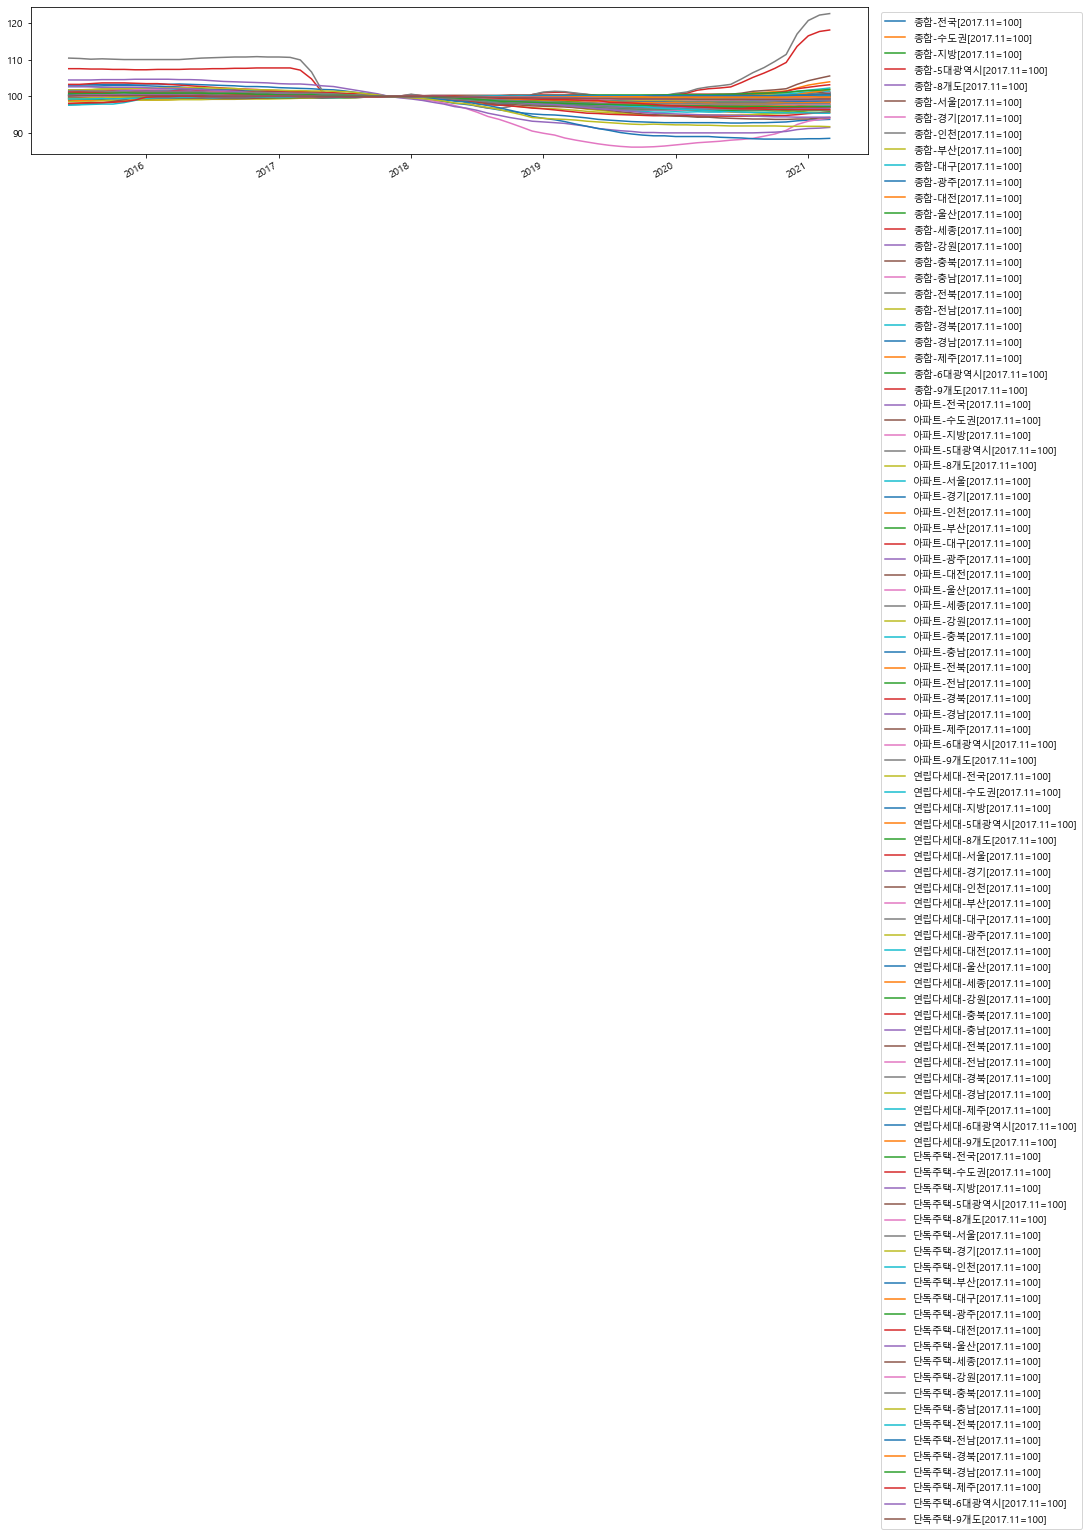

In [25]:
# 데이터 시각화
show_graph(df_hmoney)

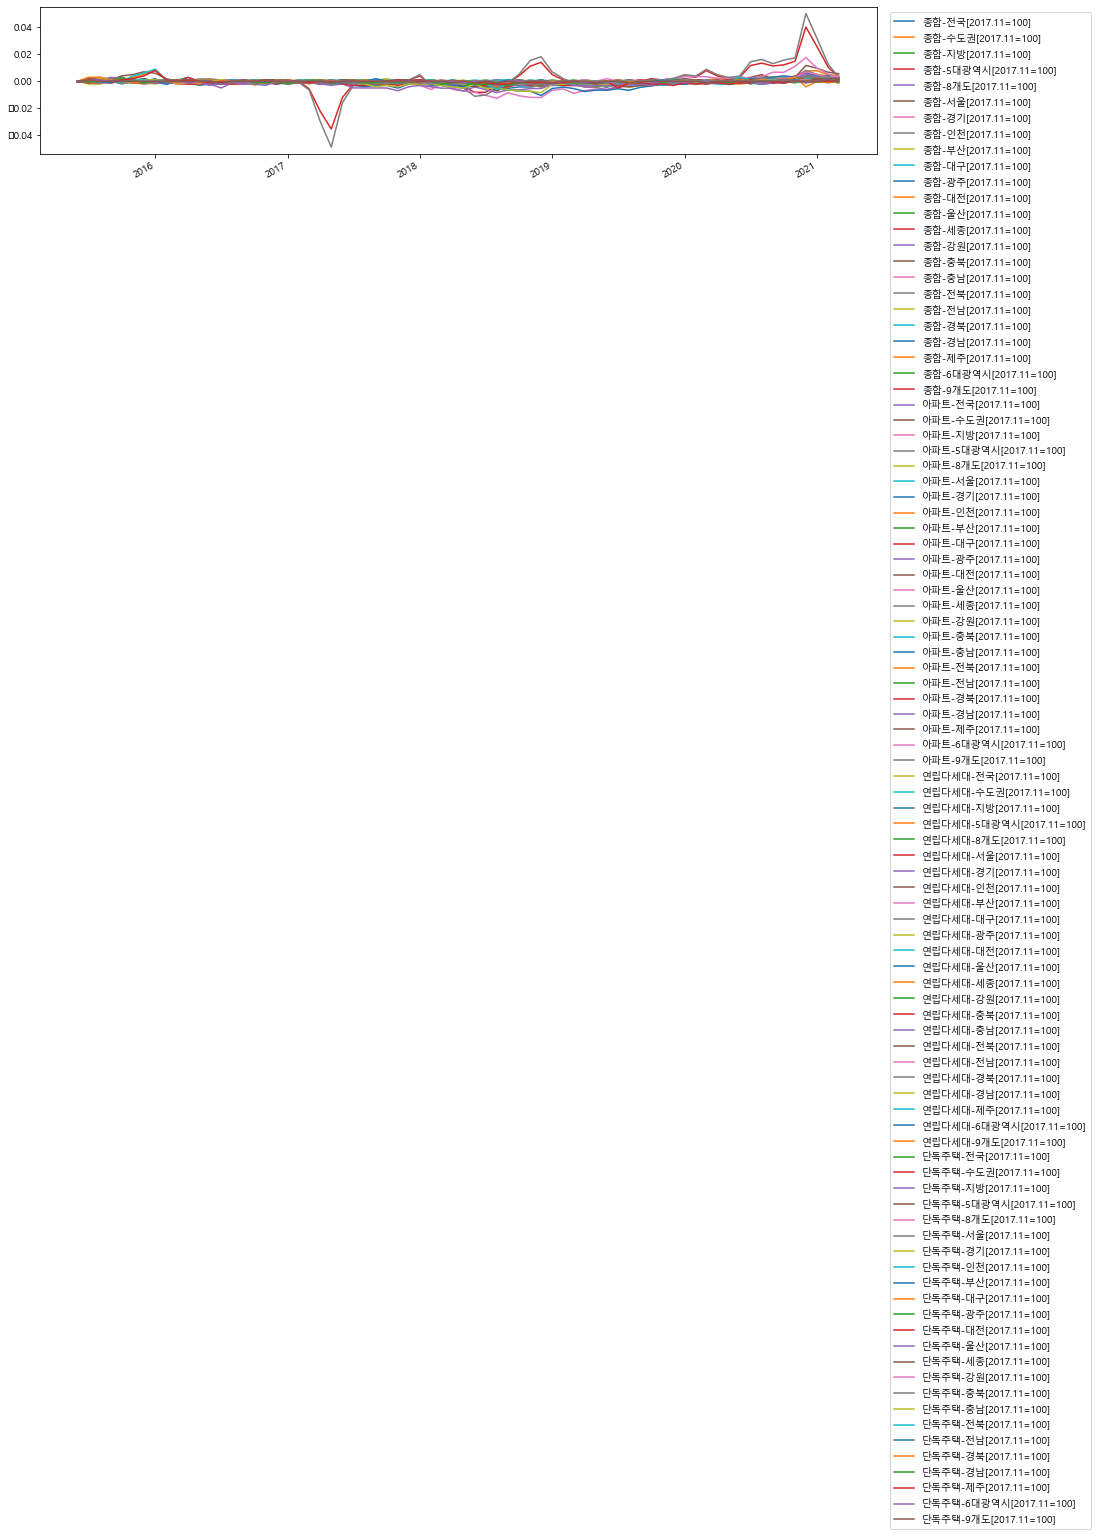

In [26]:
# 전월대비 변동률 계산
month_change = get_ratio(df_hmoney)

show_graph2(df_hmoney, month_change)

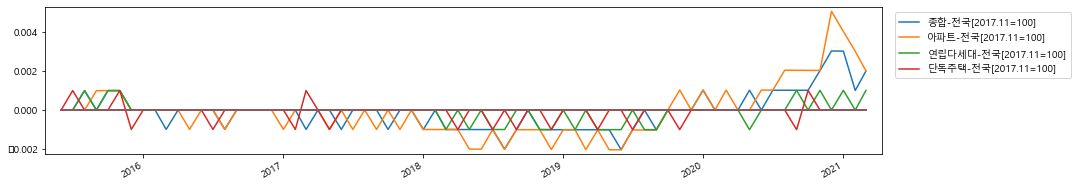

In [27]:
cols_bytype = ['종합-전국[2017.11=100]', '아파트-전국[2017.11=100]', 
               '연립다세대-전국[2017.11=100]', '단독주택-전국[2017.11=100]']   # 전국 단위 데이터 확인

show_bytype(df_hmoney, cols_bytype, month_change)

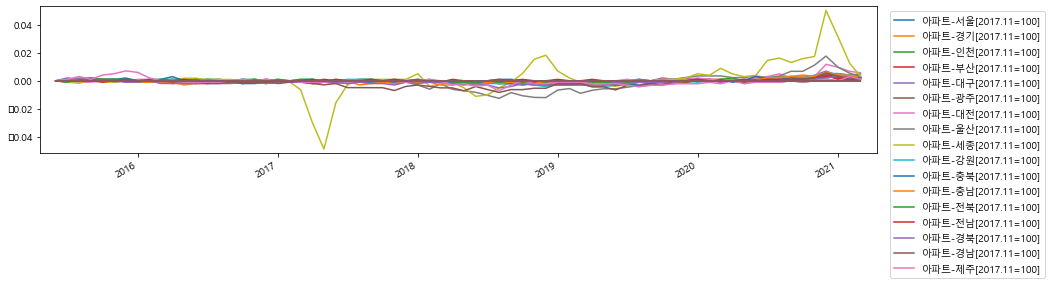

In [28]:
cols_bytype = ['아파트-서울[2017.11=100]', 
               '아파트-경기[2017.11=100]', '아파트-인천[2017.11=100]',
               '아파트-부산[2017.11=100]', '아파트-대구[2017.11=100]',
               '아파트-광주[2017.11=100]', '아파트-대전[2017.11=100]',
               '아파트-울산[2017.11=100]', '아파트-세종[2017.11=100]',
               '아파트-강원[2017.11=100]', '아파트-충북[2017.11=100]',
               '아파트-충남[2017.11=100]', '아파트-전북[2017.11=100]',
               '아파트-전남[2017.11=100]', '아파트-경북[2017.11=100]',
               '아파트-경남[2017.11=100]', '아파트-제주[2017.11=100]' ]   # 아파트-지역 데이터 확인

show_bytype(df_hmoney, cols_bytype, month_change)

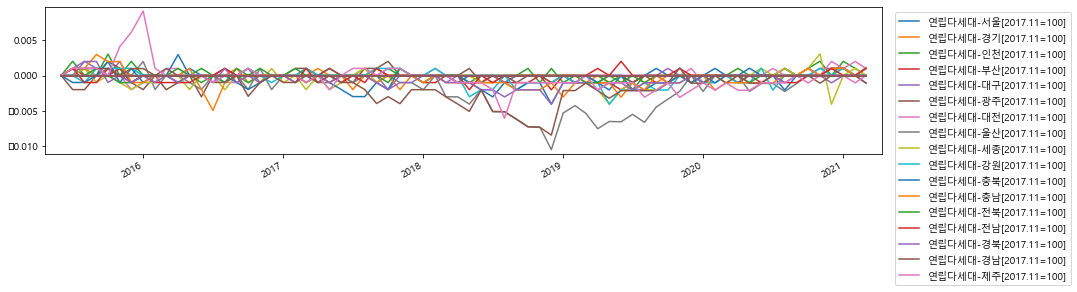

In [29]:
cols_bytype = ['연립다세대-서울[2017.11=100]', 
               '연립다세대-경기[2017.11=100]', '연립다세대-인천[2017.11=100]',
               '연립다세대-부산[2017.11=100]', '연립다세대-대구[2017.11=100]',
               '연립다세대-광주[2017.11=100]', '연립다세대-대전[2017.11=100]',
               '연립다세대-울산[2017.11=100]', '연립다세대-세종[2017.11=100]',
               '연립다세대-강원[2017.11=100]', '연립다세대-충북[2017.11=100]',
               '연립다세대-충남[2017.11=100]', '연립다세대-전북[2017.11=100]',
               '연립다세대-전남[2017.11=100]', '연립다세대-경북[2017.11=100]',
               '연립다세대-경남[2017.11=100]', '연립다세대-제주[2017.11=100]' ]   # 연립다세대-지역 데이터 확인

show_bytype(df_hmoney, cols_bytype, month_change)

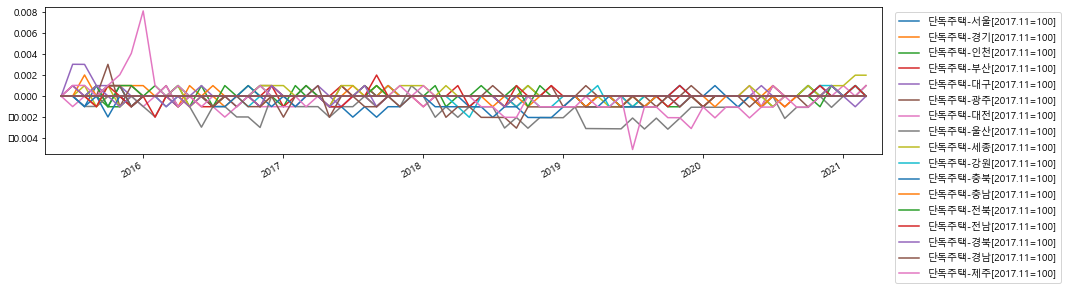

In [30]:
cols_bytype = ['단독주택-서울[2017.11=100]', 
               '단독주택-경기[2017.11=100]', '단독주택-인천[2017.11=100]',
               '단독주택-부산[2017.11=100]', '단독주택-대구[2017.11=100]',
               '단독주택-광주[2017.11=100]', '단독주택-대전[2017.11=100]',
               '단독주택-울산[2017.11=100]', '단독주택-세종[2017.11=100]',
               '단독주택-강원[2017.11=100]', '단독주택-충북[2017.11=100]',
               '단독주택-충남[2017.11=100]', '단독주택-전북[2017.11=100]',
               '단독주택-전남[2017.11=100]', '단독주택-경북[2017.11=100]',
               '단독주택-경남[2017.11=100]', '단독주택-제주[2017.11=100]' ]   # 단독주택-지역 데이터 확인

show_bytype(df_hmoney, cols_bytype, month_change)

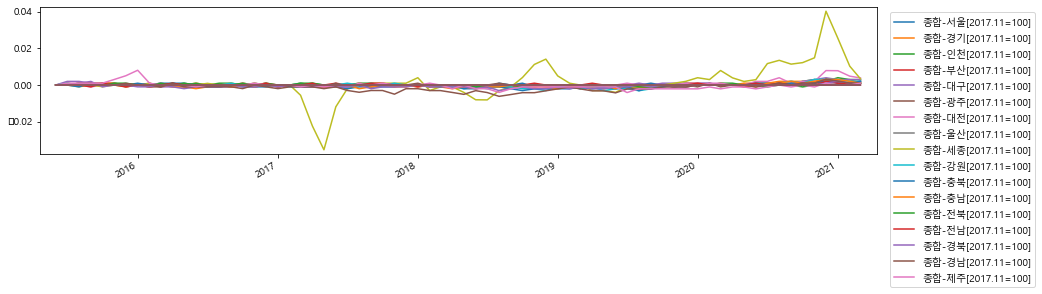

In [31]:
cols_bytype = ['종합-서울[2017.11=100]', 
               '종합-경기[2017.11=100]', '종합-인천[2017.11=100]',
               '종합-부산[2017.11=100]', '종합-대구[2017.11=100]',
               '종합-광주[2017.11=100]', '종합-대전[2017.11=100]',
               '종합-울산[2017.11=100]', '종합-세종[2017.11=100]',
               '종합-강원[2017.11=100]', '종합-충북[2017.11=100]',
               '종합-충남[2017.11=100]', '종합-전북[2017.11=100]',
               '종합-전남[2017.11=100]', '종합-경북[2017.11=100]',
               '종합-경남[2017.11=100]', '종합-제주[2017.11=100]' ]   # 종합-지역 데이터 확인

show_bytype(df_hmoney, cols_bytype, month_change)

# 2. 허가 및 기타 지수
> **1) 건축허가현황 확인**   
안면적-철근-철골조, 연면적-자재별, 연면적-용도별 크기가 가장 큼

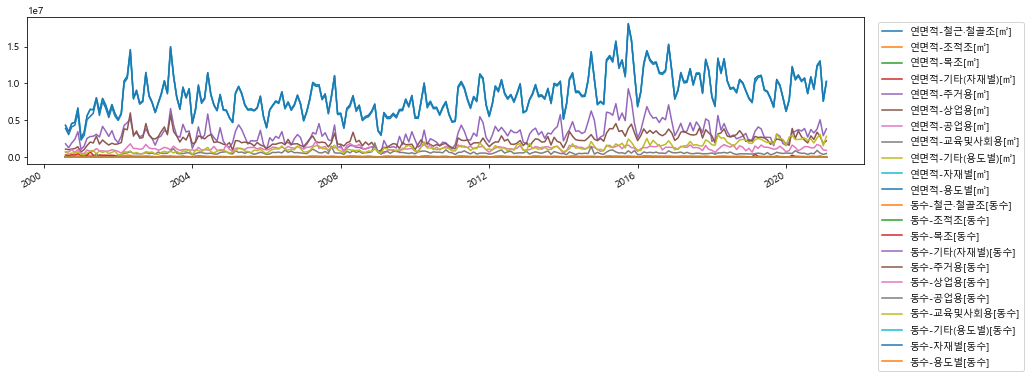

In [32]:
# 데이터 시각화
show_graph(df_build)

> **2) 주택건설인허가실적 확인**   
데이터 변화상 연간 누적치로 추측

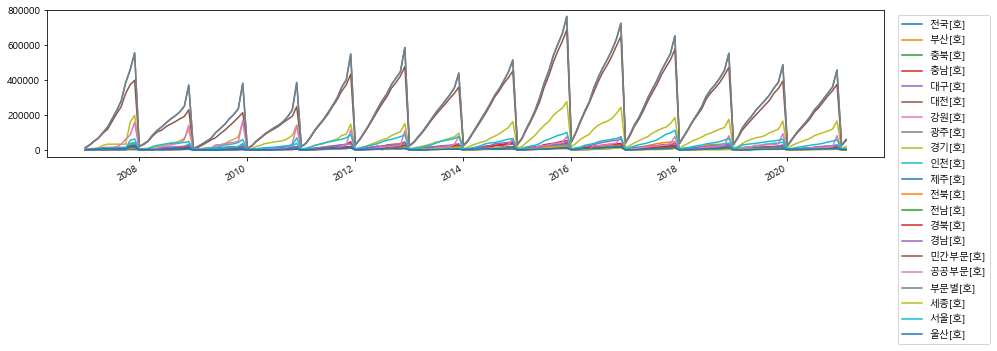

In [33]:
# 데이터 시각화
show_graph(df_build2)

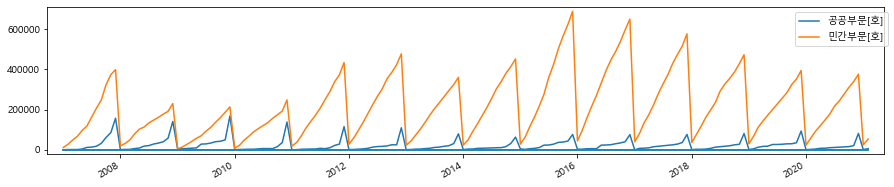

In [34]:
cols_bytype = ['공공부문[호]', '민간부문[호]']   # 공공부문과 민간부문 데이터 비교

show_bytype_og(df_build2, cols_bytype)

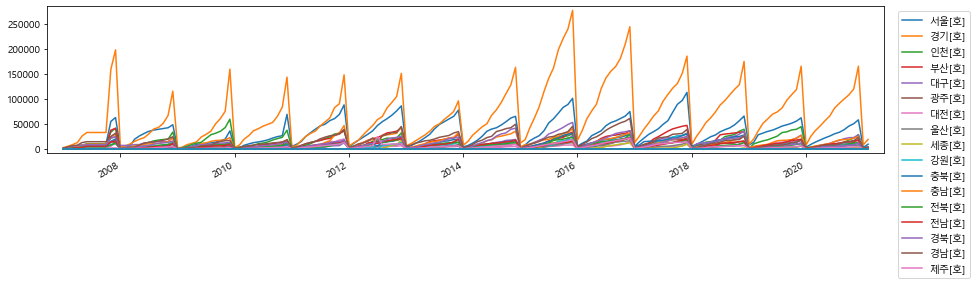

In [35]:
cols_bytype = ['서울[호]', 
               '경기[호]', '인천[호]',
               '부산[호]', '대구[호]',
               '광주[호]', '대전[호]',
               '울산[호]', '세종[호]',
               '강원[호]', '충북[호]',
               '충남[호]', '전북[호]',
               '전남[호]', '경북[호]',
               '경남[호]', '제주[호]' ]   # 지역별 데이터 확인

show_bytype_og(df_build2, cols_bytype)

> **3) 미분양주택현황 확인**   
2017년 초 수도권, 경기의 미분양이 많다가 2018년 말 경남, 경북의 미분양 증가

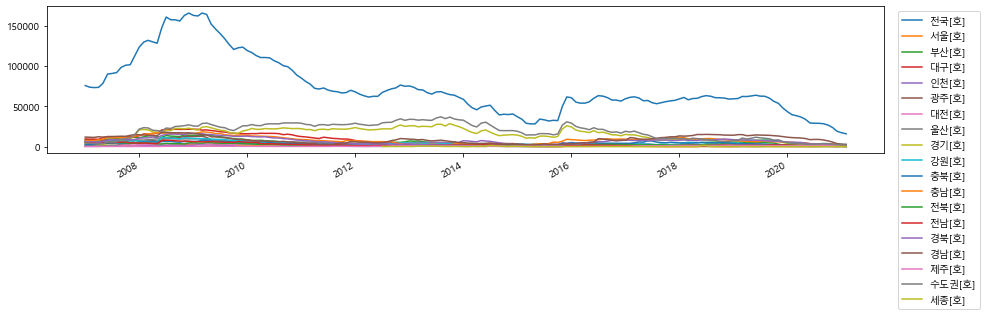

In [36]:
# 데이터 시각화
show_graph(df_house)

In [37]:
# 데이터 상승률 수치화
df_house_sub = df_house.loc['2017-01-01':'2018-12-31']
df_house_sub = df_house_sub.drop('전국[호]', axis=1)
tuple_list_fst = []
tuple_list_lst = []

for i, col in enumerate(df_house_sub.columns):
    tuple_list_fst.append((col, df_house_sub.values[0][i]))
    tuple_list_lst.append((col, df_house_sub.values[-1][i]))
tuple_list_fst.sort(key=lambda x: -x[1])
tuple_list_lst.sort(key=lambda x: -x[1])

print('2017-01-01:', tuple_list_fst[:5])
print('2018-12-31:', tuple_list_lst[:5])
df_house_sub.head()

2017-01-01: [('수도권[호]', 18938.0), ('경기[호]', 15092.0), ('충남[호]', 9094.0), ('경북[호]', 8032.0), ('경남[호]', 7785.0)]
2018-12-31: [('경남[호]', 14147.0), ('경북[호]', 8995.0), ('충남[호]', 7763.0), ('수도권[호]', 6319.0), ('강원[호]', 5736.0)]


,서울[호],부산[호],대구[호],인천[호],광주[호],대전[호],울산[호],경기[호],강원[호],충북[호],충남[호],전북[호],전남[호],경북[호],경남[호],제주[호],수도권[호],세종[호]
2017-01-01,205.0,1102.0,828.0,3641.0,818.0,551.0,682.0,15092.0,3466.0,4043.0,9094.0,2468.0,1153.0,8032.0,7785.0,353.0,18938.0,0.0
2017-02-01,187.0,1041.0,703.0,3335.0,764.0,726.0,811.0,14492.0,3281.0,3982.0,8970.0,2278.0,1145.0,7785.0,11117.0,446.0,18014.0,0.0
2017-03-01,200.0,959.0,627.0,4501.0,696.0,998.0,789.0,14465.0,3064.0,4415.0,8785.0,2087.0,1108.0,7538.0,10712.0,735.0,19166.0,0.0
2017-04-01,157.0,905.0,529.0,3703.0,1392.0,935.0,736.0,13309.0,3297.0,5755.0,8715.0,2130.0,1023.0,7472.0,9341.0,914.0,17169.0,0.0
2017-05-01,119.0,836.0,383.0,3158.0,1326.0,888.0,713.0,11958.0,3013.0,5433.0,8312.0,1956.0,979.0,7774.0,9040.0,971.0,15235.0,0.0


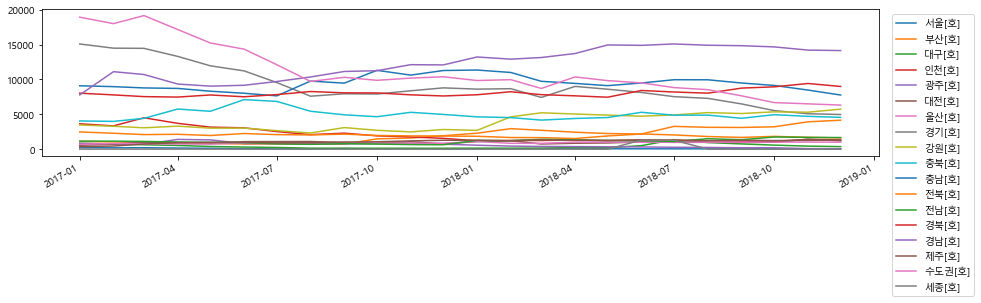

In [38]:
show_graph(df_house_sub)

> **국토부의 규제지역 지정 자료**에 따르면,   
2017년 하반기 수도권과 경기 규제지역 지정이 많아지며 미분양 주택 수요가 늘어난 것으로 보임
![규제지역 지정 현황](https://lh3.googleusercontent.com/proxy/FWTPYi4gzj7HxWRDHPvLP0aDH_gHVV3jH_P8UshLaLECVANQfnHqoq8Ra0_aaOM2PwYmkZ9hh-iyDF7SmJoQJySVA8slwkvyk5YQcQ-jBxEnF4qmK91Ge_lUmKXO-iitj_H3P39Y_L0lhXqlnIMheguxqh26q6QMo2TUD0mFkZmZg2k4BHffP4HOtIXtqJbDCwQYc1vXJTLANA8vq7-c5YQFJxVfS246JyidlagMM97ZnetOPONmefkarBBFAWEw_Zt0W-cilAdEwh1VFmTszqc1YpQE0mmpFXNYNarhHGZcsxdebq2kFFHysvu6kFc3o6bwO3y5X8nlkw "규제지역 지정 현황")

> **4) 국내건설수주액 확인**   
건설수주액은 민간부문이 공공부문보다 크지만, 변동폭은 공공부문이 더 큼   
건설수주액은 비제조업이 제조업보다 크지만, 변동폭은 80년 이후 제조업이 더 큼   
기반시설의 경우 도로 및 교량, 댐, 철도 및 궤도를 제외하면 수주액이 상대적으로 적음

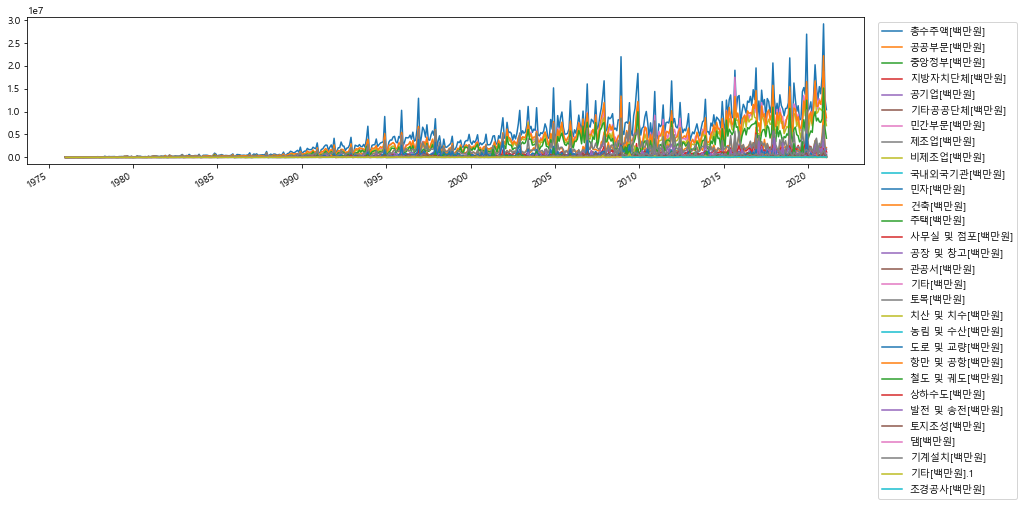

In [39]:
# 데이터 시각화
show_graph(df_money)

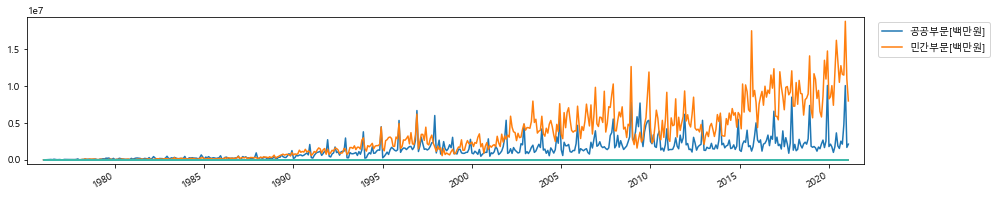

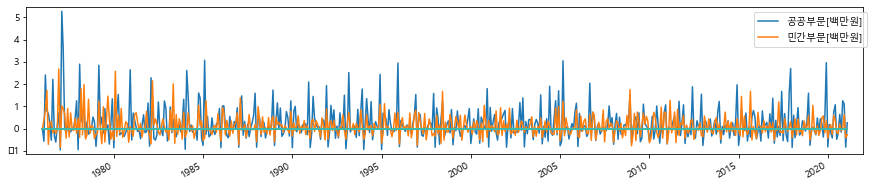

In [40]:
# 전월대비 변동률 계산
build_change = get_ratio(df_money)
cols_bytype = ['공공부문[백만원]', '민간부문[백만원]']   # 공공부문과 민간부문 데이터 비교

show_bytype_og(df_money, cols_bytype)
show_bytype(df_money, cols_bytype, build_change)

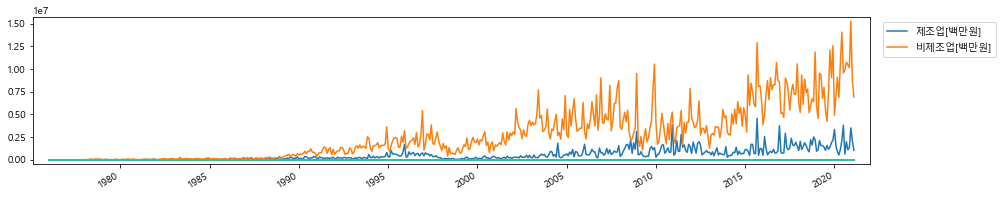

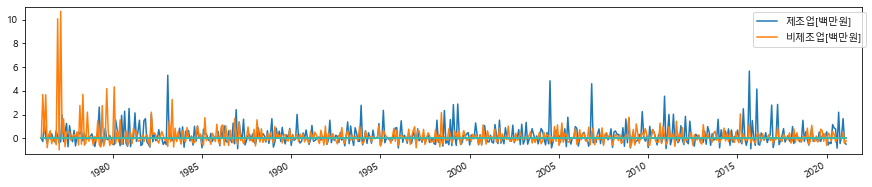

In [41]:
cols_bytype = ['제조업[백만원]', '비제조업[백만원]']   # 제조업과 비제조업 데이터 비교

show_bytype_og(df_money, cols_bytype)
show_bytype(df_money, cols_bytype, build_change)

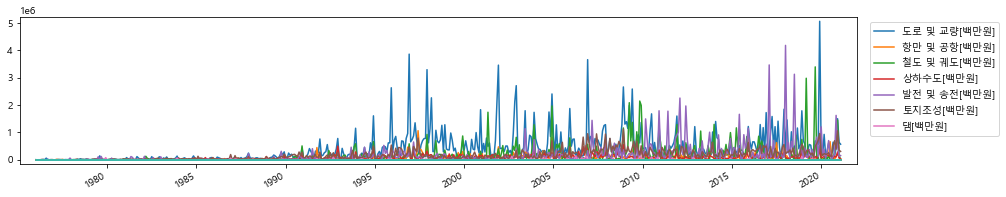

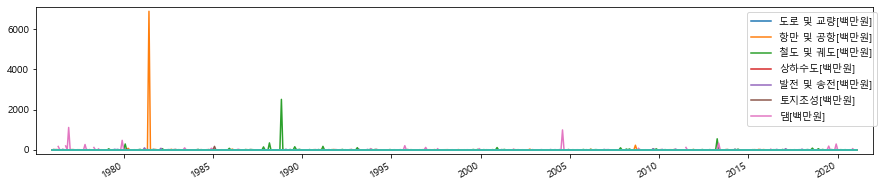

In [42]:
cols_bytype = ['도로 및 교량[백만원]', '항만 및 공항[백만원]', '철도 및 궤도[백만원]',
               '상하수도[백만원]', '발전 및 송전[백만원]','토지조성[백만원]', '댐[백만원]']   # 기반시설 데이터 비교

show_bytype_og(df_money, cols_bytype)
show_bytype(df_money, cols_bytype, build_change)